In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import plotly.io as pio
# pio.renderers.default = "colab" #Colab configs for plotly


In [75]:
loan_data = pd.read_csv("loan.csv", low_memory=False,  header = 0)

### Data Cleaning and Manipulation 



In [76]:
#  There is no Incorrect rows - Header rows, footer rows
#  There is no Summary rowsTotal, subtotal rows
#  There is no Extra rows,Column numbers, indicators, blank rows
#  Missing Column NamesColumn names as blanks, NA, XX etc.
#  There is no Inconsistent column names ,X1, X2,C4 which give no information about the column

#  No Unique Identifier E.g.  Multiple cities with same name in a column
#  Misaligned columns Shifted columns
#  There is no Columns containing Multiple data values	E.g. address columns containing city, state, country



#####  Cleaned up Unnecessary columns 


In [77]:
# Keep only columns where 80% or more valid data is available

In [78]:
df_cleaned_columns = loan_data.dropna(how='any',axis=1,thresh=loan_data.shape[0]*0.8)


#####  Cleaned up Unnecessary rows 

In [79]:
# Keep only rows where 70% or more valid data is available

In [80]:
df_cleaned_rows = df_cleaned_columns.dropna(how='any',axis=0,thresh=df_cleaned_columns.shape[1]*0.7 )

######  There is no duplicate content in data frame

In [81]:
df_cleaned_rows[df_cleaned_rows.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 53 columns]

##### Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.


| Customer Behavior Variables |
| :---        | 
|delinq_2yrs|
|earliest_cr_line|
|inq_last_6mths|
|open_acc|
|pub_rec|
|revol_bal|
|revol_util|
|total_acc|
|out_prncp|
|out_prncp_inv|
|total_pymnt|
|total_pymnt_inv|
|total_rec_prncp|
|total_rec_int|
|total_rec_late_fee|
|recoveries|
|collection_recovery_fee|
|last_pymnt_d|
|last_pymnt_amnt|
|last_credit_pull_d|
|application_type




In [82]:
df_cleaned_rows.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths',
                      'open_acc','pub_rec','revol_bal','revol_util',
                      'total_acc','out_prncp','out_prncp_inv','total_pymnt',
                      'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                      'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                      'last_credit_pull_d','application_type'], axis=1,inplace = True)


##### Below columns are dropped for multiple reasons



In [83]:
# Few are credit bureau informations as account now deliquent, chargedoff in 12 months etc
# Few are single valued informative policy code, payment plan

In [84]:
df_cleaned_rows.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths',
                      'acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status',
                      'title','url','pymnt_plan'], axis=1,inplace = True)

##### Renaming columns to meaningful names

In [85]:
# Rename Employee length to Employee Experience
# Rename issue date to Loan Date
# Rename dti to debt_to_income
df_cleaned_rows.rename(columns = {'emp_length':'emp_exp',
                                  'issue_d':'loan_date',
                                  'dti':'debt_to_income'
                                 }, inplace = True)

In [86]:
df_cleaned_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_exp               38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  loan_date          

####  Below Column are the Date columns but dtypes are object types. Convert these columns into Date format Dtype
#### Convert Loan date in to new columns called Loan month and Loan year
| Column      | Dtype| 
| :---        |    :----:   |  
| loan_date | object       | 


In [87]:
df_cleaned_rows['loan_date'] = pd.to_datetime(df_cleaned_rows['loan_date'],format='%b-%y')
df_cleaned_rows['loan_month'] = df_cleaned_rows['loan_date'].dt.month_name()
df_cleaned_rows['loan_month']

0        December
1        December
2        December
3        December
4        December
           ...   
39712        July
39713        July
39714        July
39715        July
39716        June
Name: loan_month, Length: 39717, dtype: object

##### Zipcode is converted into integer format

In [88]:
df_cleaned_rows['zip_code'] = df_cleaned_rows['zip_code'].map(lambda x: int(x.replace('xx','')))


#####  Convert Interest rate column to float after removing %

In [89]:
df_cleaned_rows['int_rate'] = df_cleaned_rows['int_rate'].map(lambda x: float(x.replace('%','')))


#####  Convert Investor funded amount to 2 decimals %

In [90]:
df_cleaned_rows['funded_amnt_inv'] = df_cleaned_rows['funded_amnt_inv'].round(2)


In [91]:
df_cleaned_rows['emp_exp'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_exp, dtype: int64

#####  Convert Emp length to integer possible values 

In [92]:
# Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#  nan is not valid value hence filled with value 0


In [93]:
def remove_years(x):
    x=str(x)
    if x == '10+ years':
        x = 10
    elif x == '< 1 year':
        x = 0
    elif x == '1 year':
        x = 1
    elif x == 'nan':
        x = 0
    else:
        x = x[0]
    return x

df_cleaned_rows['emp_exp'] = df_cleaned_rows['emp_exp'].apply(remove_years)
df_cleaned_rows['emp_exp'] = df_cleaned_rows['emp_exp'].astype('int64')


#### Filter records such that Funded Amount and Funded Amount Investor doesn't exceed loan amount. Example below

|Loan Amount     | Funded Amount | Funded Amount Investor|
| :---        |    :----:   |    :----:   |  
| 1000      |    800   |    700   |  
| 1000      |    800   |    900   |  



In [94]:
# Funded Amount <= Loan Amount
# Funded Amount Investor >= Funded Amount OR Funded Amount Investor <= Funded Amount
# Funded Amount Investor <= Loan Amount


df_cleaned_rows[(df_cleaned_rows['loan_amnt']>=df_cleaned_rows['funded_amnt']) &
                (df_cleaned_rows['loan_amnt']>=df_cleaned_rows['funded_amnt_inv'])
               ].shape


(39717, 23)

In [95]:
df_cleaned_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   member_id             39717 non-null  int64         
 2   loan_amnt             39717 non-null  int64         
 3   funded_amnt           39717 non-null  int64         
 4   funded_amnt_inv       39717 non-null  float64       
 5   term                  39717 non-null  object        
 6   int_rate              39717 non-null  float64       
 7   installment           39717 non-null  float64       
 8   grade                 39717 non-null  object        
 9   sub_grade             39717 non-null  object        
 10  emp_title             37258 non-null  object        
 11  emp_exp               39717 non-null  int64         
 12  home_ownership        39717 non-null  object        
 13  annual_inc      

In [96]:
# From Dataframe info we observe that pub_rec_bankruptcies has only 39020 entries.
# Rest of the entries can be filled with Mode of the value in the column  assuming there are no bankrupcies
df_cleaned_rows.pub_rec_bankruptcies.fillna(df_cleaned_rows.pub_rec_bankruptcies.mode()[0], inplace=True)

In [97]:
# Since the Loan status  marked 'current' are neither fully paid not defaulted, lets get rid of records with this value
df_cleaned_rows = df_cleaned_rows[df_cleaned_rows.loan_status!='Current']

In [98]:
df_cleaned_rows.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#  Univariant Analysis

| Column      | Type of Variable | 
| :---        |    :----:   |  
| term | Ordered Categorical      | 
| int_rate | Ordered Categorical      | 
| grade | Ordered Categorical      | 
| sub_grade | Ordered Categorical      | 
| emp_exp| Ordered Categorical      | 
| home_ownership | UnOrdered Categorical      | 
| verification_status | UnOrdered Categorical      | 
| loan_status| Ordered Categorical      | 
| purpose| UnOrdered Categorical      | 
| loan_amnt| Quantitative       | 
| funded_amnt| Quantitative       | 
| funded_amnt_inv| Quantitative       | 
| dti | Quantitative       | 






### Categorical Variables

In [99]:
# Loan Applicants percentage is high for 36 months term

<AxesSubplot:>

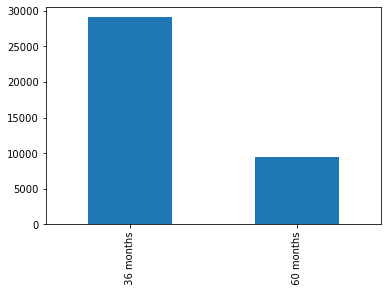

In [100]:
df_cleaned_rows.term.value_counts().plot.bar()

In [101]:
# Number of Loan applicants are higher with interest rate % for 7.5 and between (10 -12)

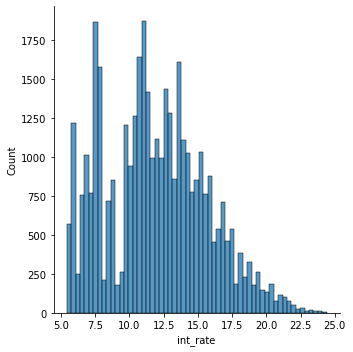

In [102]:
sns.displot(df_cleaned_rows.int_rate)
plt.show()

In [103]:
# Applicants with Loan Grade E,F,G are lesser in number and Highest Applicants are with loan grade B

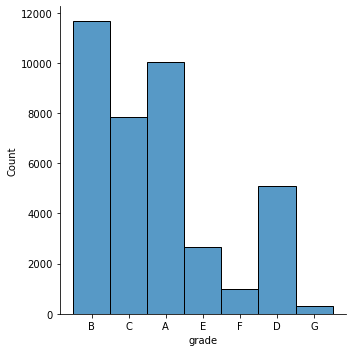

In [104]:
sns.displot(df_cleaned_rows.grade)
plt.show()

In [105]:
# Loan Applicants with 10+ years experience get more loans

<AxesSubplot:>

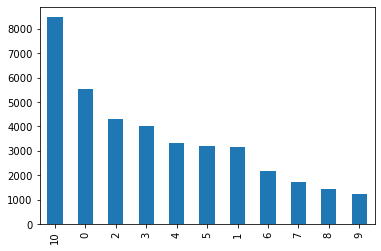

In [106]:
df_cleaned_rows.emp_exp.sort_values().value_counts().plot.bar()

In [107]:
# Applicants staying in Rented Houses and Mortagage get high chances of Loans

<AxesSubplot:>

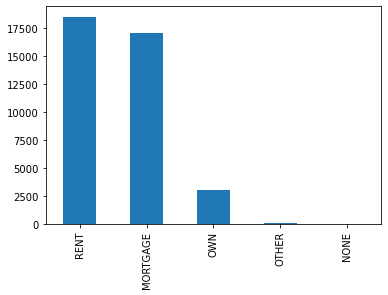

In [108]:
df_cleaned_rows.home_ownership.value_counts().plot.bar()

In [109]:
# Most of Loans are approved without been NOT VERIFIED

<AxesSubplot:>

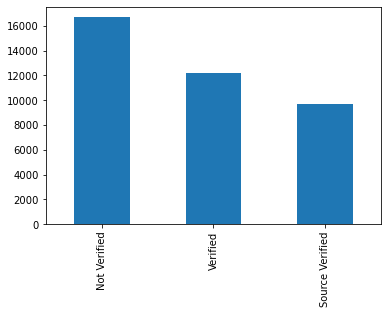

In [110]:
df_cleaned_rows.verification_status.value_counts().plot.bar()


In [111]:
# % of Fully Paid ratio is higher compared to Charged off 

<AxesSubplot:>

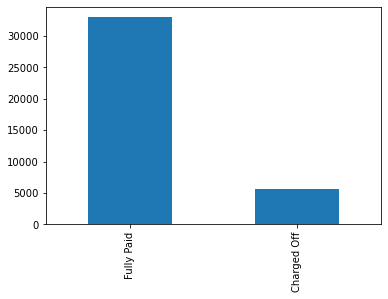

In [112]:
df_cleaned_rows.loan_status.value_counts().plot.bar()

In [113]:
# Applicants with purpose of Debt_consolidation have high chance of Loan been approved.

<AxesSubplot:>

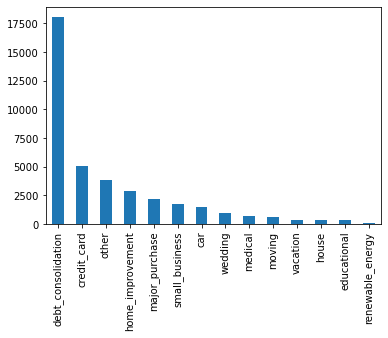

In [114]:
df_cleaned_rows.purpose.value_counts().plot.bar()

### Quantative Variables

In [115]:
# Loan Applicants with debt to income ratio of 15 are the highest loan receivers.

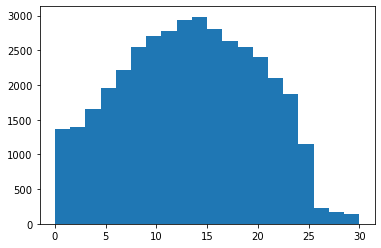

In [116]:
plt.hist(df_cleaned_rows.debt_to_income,bins=20)
plt.show()

In [117]:
# Most loans are approved between 3k and 15k 
# Loans applicants  with approved amount of 20K and above are less in number.

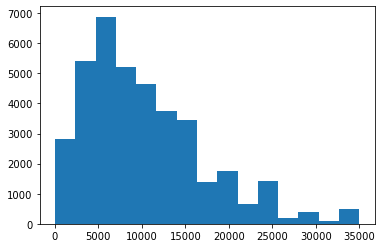

In [118]:
plt.hist(df_cleaned_rows.funded_amnt_inv,bins=15)
plt.show()

## Segmented Univariants

In [119]:
# find out applicants applied for 3 years term
df_loan_applicants_3years = df_cleaned_rows[df_cleaned_rows['term']==" 36 months"]
df_loan_applicants_3years.shape


(29096, 23)

In [120]:
# find out applicants applied for 5 years term
df_loan_applicants_5years = df_cleaned_rows[df_cleaned_rows['term']==' 60 months']
df_loan_applicants_5years.shape

(9481, 23)

In [121]:
# find out percentage of loan applicants applied for 3 years term
loan_app_3years_percent = (df_loan_applicants_3years.shape[0]/df_cleaned_rows.shape[0])*100
round(loan_app_3years_percent,2)

75.42

In [122]:
# find out percentage of loan applicants applied for 5 years term
loan_app_5years_percent = (df_loan_applicants_5years.shape[0]/df_cleaned_rows.shape[0])*100
round(loan_app_5years_percent,2)

24.58

## Bivariant Analysis

In [123]:
# find out percentage of loan applicants applied for 3 years term with interest rate between (5-10)%
app_3years_5_10_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=5.00) & (df_loan_applicants_3years.int_rate<10.00)].shape[0]
int_5_10_3years_perc = (app_3years_5_10_count/df_loan_applicants_3years.shape[0])*100
print(f"(5-10)% value is {round(int_5_10_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (10-15)%
app_3years_10_15_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=10.00) & (df_loan_applicants_3years.int_rate<15.00)].shape[0]
int_10_15_3years_perc = (app_3years_10_15_count/df_loan_applicants_3years.shape[0])*100
print(f"(10-15)% value is {round(int_10_15_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (15-20)%
app_3years_15_20_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=15.00) & (df_loan_applicants_3years.int_rate<20.00)].shape[0]
int_15_20_3years_perc = (app_3years_15_20_count/df_loan_applicants_3years.shape[0])*100
print(f"(15-20)% value is {round(int_15_20_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (20-25)%
app_3years_20_25_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=20.00) & (df_loan_applicants_3years.int_rate<25.00)].shape[0]
int_20_25_3years_perc = (app_3years_20_25_count/df_loan_applicants_3years.shape[0])*100
print(f"(20-25)% value is {round(int_20_25_3years_perc,2)}")

(5-10)% value is 38.97
(10-15)% value is 49.46
(15-20)% value is 11.32
(20-25)% value is 0.25


In [124]:
# find out percentage of loan applicants applied for 5 years term with interest rate between (5-10)%
app_5years_5_10_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=5.00) & (df_loan_applicants_5years.int_rate<10.00)].shape[0]
int_5_10_5years_perc = (app_5years_5_10_count/df_loan_applicants_5years.shape[0])*100
print(f"(5-10)% value is {round(int_5_10_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (10-15)%
app_5years_10_15_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=10.00) & (df_loan_applicants_5years.int_rate<15.00)].shape[0]
int_10_15_5years_perc = (app_5years_10_15_count/df_loan_applicants_5years.shape[0])*100
print(f"(10-15)% value is {round(int_10_15_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (15-20)%
app_5years_15_20_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=15.00) & (df_loan_applicants_5years.int_rate<20.00)].shape[0]
int_15_20_5years_perc = (app_5years_15_20_count/df_loan_applicants_5years.shape[0])*100
print(f"(15-20)% value is {round(int_15_20_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (20-25)%
app_5years_20_25_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=20.00) & (df_loan_applicants_5years.int_rate<25.00)].shape[0]
int_20_25_5years_perc = (app_5years_20_25_count/df_loan_applicants_5years.shape[0])*100
print(f"(20-25)% value is {round(int_20_25_5years_perc,2)}")


(5-10)% value is 7.69
(10-15)% value is 43.5
(15-20)% value is 41.46
(20-25)% value is 7.35


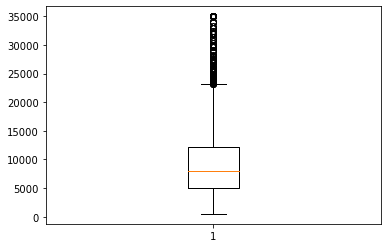

In [125]:
# Loan amount percentiles can be analyzed here.
plt.boxplot(df_loan_applicants_3years.loan_amnt)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

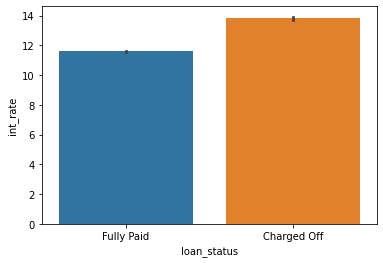

In [126]:
# charged off Ratio is higher when analyzed with Interest rate.
sns.barplot(x = 'loan_status', y = 'int_rate', data = df_cleaned_rows)

In [127]:
# Loans with 36 months tenure has high probability of Loan been fully paid.

<AxesSubplot:xlabel='term'>

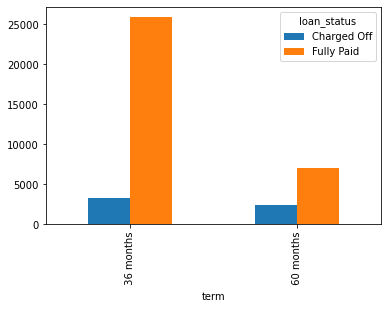

In [128]:
df_cleaned_rows.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar')

In [129]:
# Charge off % is less for Loan Grades F and G
# Loan Grades with B and C are defaulting.

<AxesSubplot:xlabel='grade'>

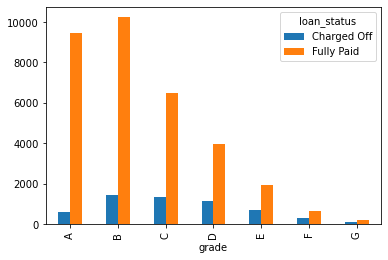

In [130]:
df_cleaned_rows.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')

In [131]:
# Applicants with Purpose of loan as Debt consolidation have high chances of Defaulting loan.

<AxesSubplot:xlabel='purpose'>

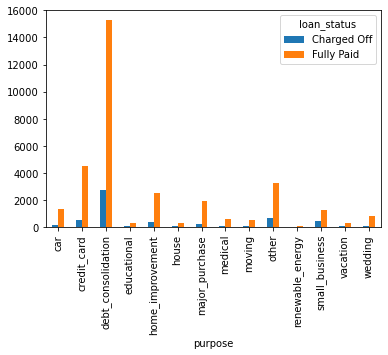

In [132]:
df_cleaned_rows.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')

In [133]:
# Employees with 0 and 10+ worke experience have probability of Defauling the loans.

<AxesSubplot:xlabel='emp_exp'>

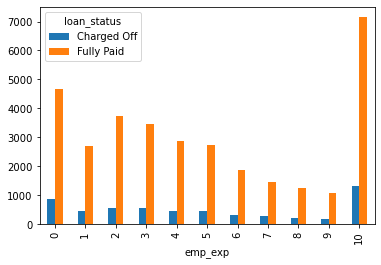

In [134]:
df_cleaned_rows.groupby('emp_exp')['loan_status'].value_counts().unstack().plot(kind='bar')

In [135]:
# Defaulting loan is almost similar with regards to Verification status

<AxesSubplot:xlabel='verification_status'>

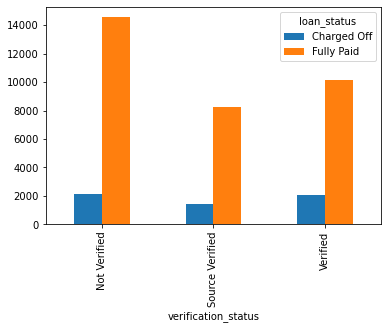

In [136]:
df_cleaned_rows.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar')

## Correlation Matrix

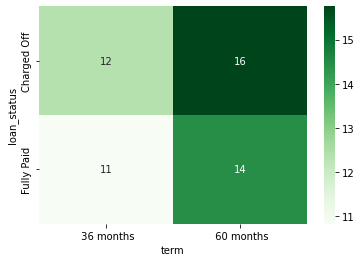

In [137]:
# Finding correlation between Loan Status, Term with Interest rate considering Means of Interest rates
# Applicants with 5years term  and with Hight interest rates average of 13 and above are Loan Defaulters.
#  Applicants with 3years term  and with Hight interest rates average of  13 and above are Loan Defaulters.
df_filtered_cols = df_cleaned_rows[['loan_status','term','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="loan_status",columns="term",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()




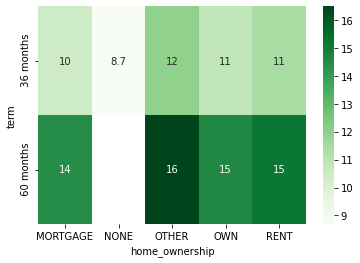

In [138]:
# Finding correlation between Home ownership, Term with Interest rate
# Applicants with 5years term and with home owner ship as others with low interest rates average of 9-12 are high in number.
# Applicants with 3years term and with home owner ship as others with high interest rates average of 13-16 are high in number. 
df_filtered_cols = df_cleaned_rows[['home_ownership','term','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="term",columns="home_ownership",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

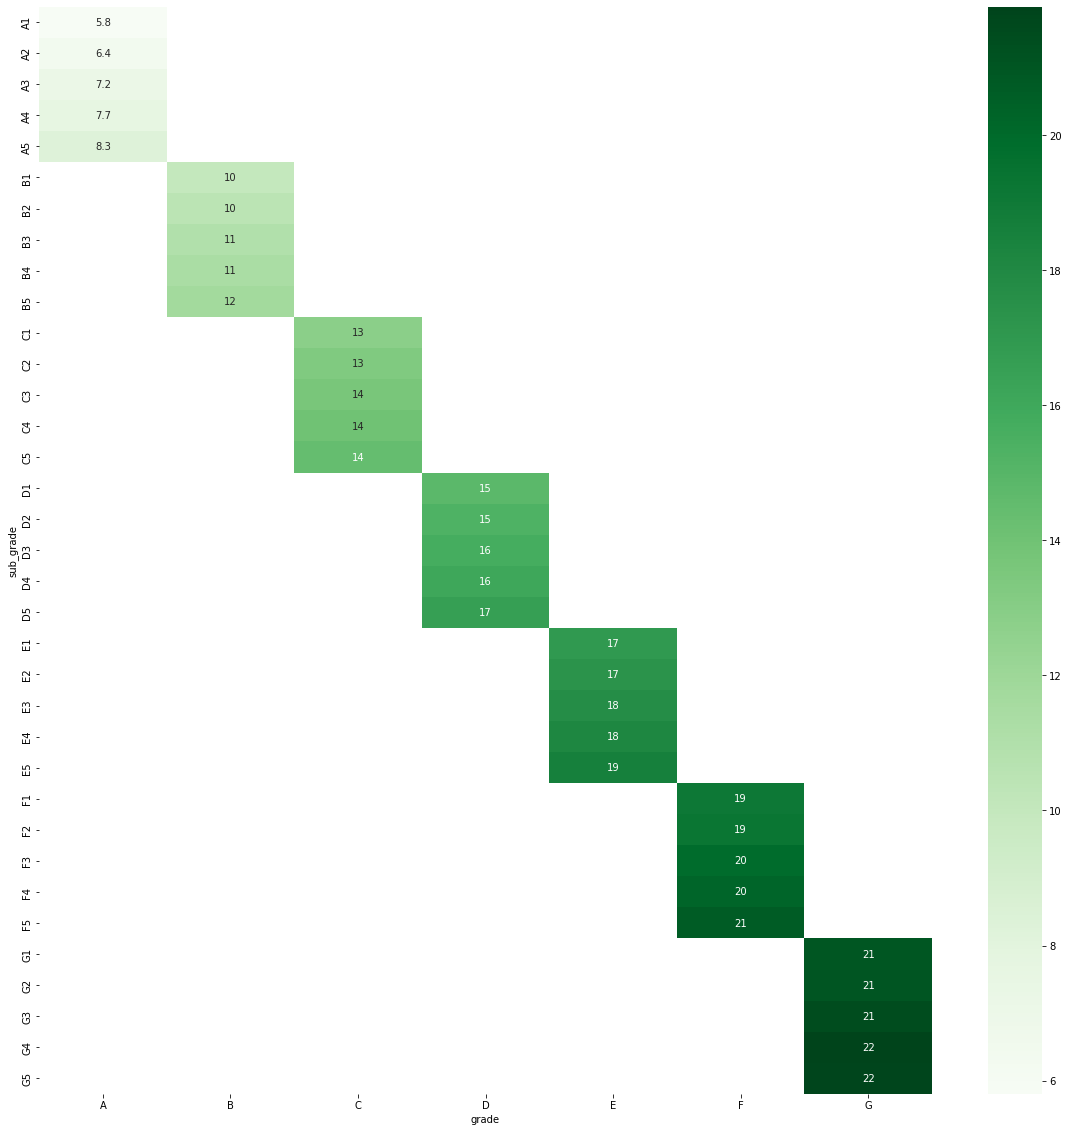

In [139]:
# Find out which Grade loan applicants has Highest Interest rate and lowest interest rates.
# Finding correlation between Grade, Subgrade with Interest rate
# Lowest interst rates are in Loan Grade A.
# Highest interest reates are in Loan Grade G.
plt.figure(figsize=[20,20])
df_filtered_cols = df_cleaned_rows[['grade','sub_grade','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="sub_grade",columns="grade",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

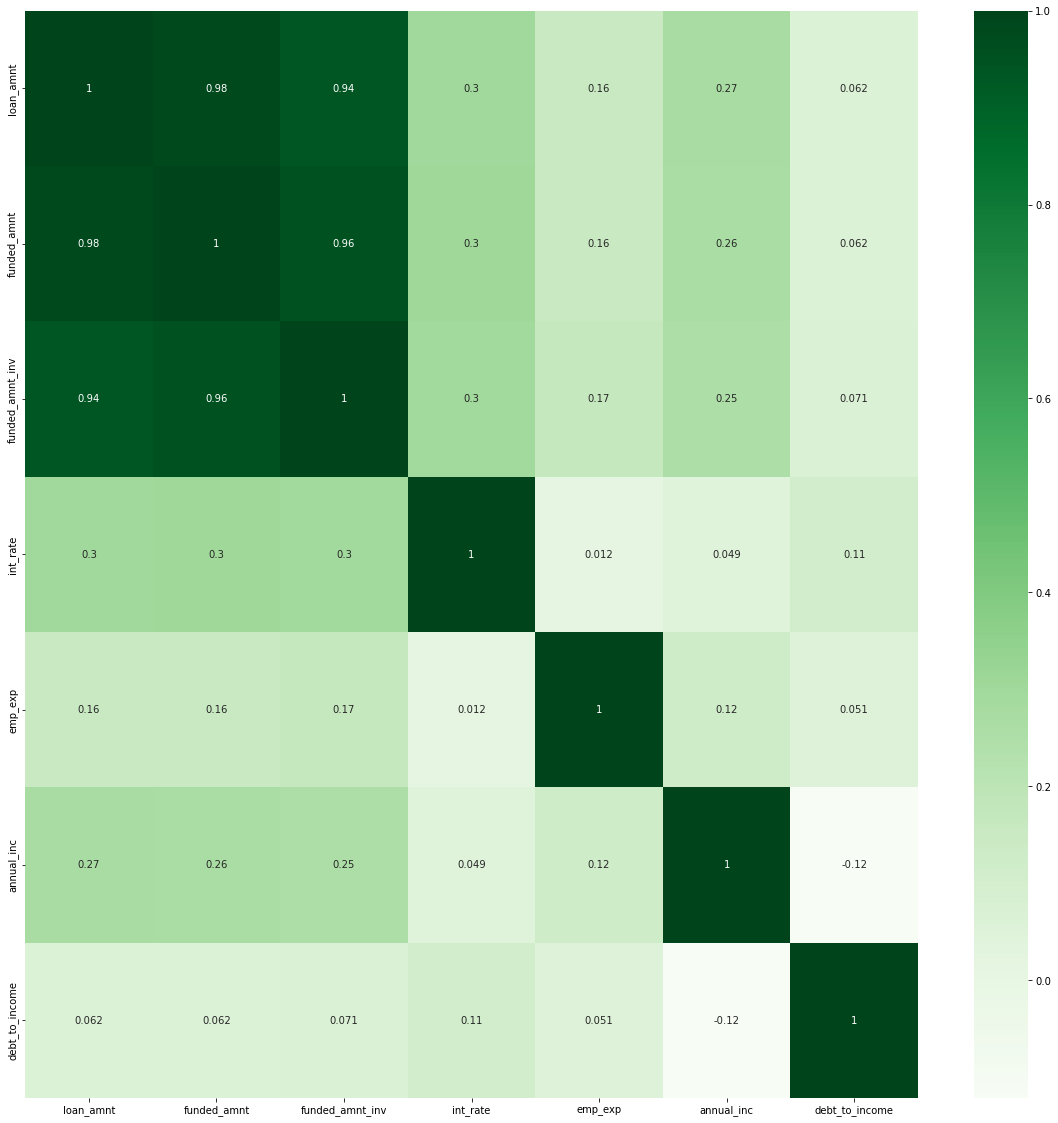

In [140]:
# Loan amount, funded amount and funded amount investor are Positively correlated.
# Annual income and Debt to income are slightly correlated negative with 0.12


plt.figure(figsize=[20,20])
df_temp = df_cleaned_rows
df_temp.drop(['zip_code','id','member_id','installment','pub_rec_bankruptcies'], axis=1,inplace = True)
sns.heatmap(df_temp.corr(),cmap = "Greens", annot=True)
plt.show()

# Derived Metrics

In [141]:
# We could derive new column say Risk from Loan status assuming Fully paid as Low risk and Charged of as High risk
# we could derived member id from URL but since explicitly member id column exists we are not deriving it agian.
# we would derive new column say Year and get insights of loan defaults w.r.t year.
# Loans issued in Year 2011 has Highest number of Defaulted.

<AxesSubplot:xlabel='loan_year'>

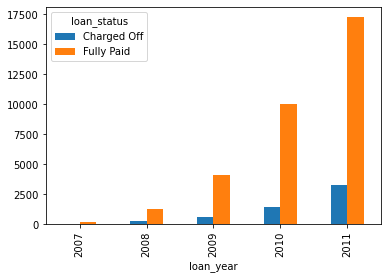

In [142]:
df_cleaned_rows['loan_year'] = df_cleaned_rows['loan_date'].dt.year
df_cleaned_rows.groupby('loan_year')['loan_status'].value_counts().unstack().plot(kind='bar')

# Below Visualization Give us Idea on Driving factors which can play role in Loan Defaulting

In [145]:
tr0 = go.Bar(
            x = ['Loan Closed'],
            y = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Loan Closed'
    )

tr1 = go.Bar(
            x = ['Loan Default'],
            y = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Loan Default'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Loan Status'
    ),
    title='Loan Status distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

# Loan Applicant Work Experience is not an Driving factor as there is similar behavior for Loans fully paid and Defaults.

In [146]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']["emp_exp"].values.tolist()
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']["emp_exp"].values.tolist()
df_emp_exp = df_cleaned_rows['emp_exp'].values.tolist()


#First plot
tr0 = go.Histogram(
    x=df_loan_closed,
    histnorm='probability',
    name="Loan Closed"
)
#Second plot
tr1 = go.Histogram(
    x=df_loan_default,
    histnorm='probability',
    name="Loan Default"
)
#Third plot
tr2 = go.Histogram(
    x=df_emp_exp,
    histnorm='probability',
    name='Loan Applicant Work Experience'
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Loan Closed','Loan Default', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Work Experience Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [147]:
df_cleaned_rows.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [148]:
# For tenure of 36 months,interest rates with 10.37% and higher would always have high chance of Defaults.
# For tenure of 60 months,interest rates with 13.06% and higher would always have high chance of Defaults.

In [149]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["int_rate"],
    x=df_loan_closed["term"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["int_rate"],
    x=df_loan_default["term"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Interest Rates ',
        zeroline=False
    ),
    xaxis=dict(
        title='Loan Term'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')

In [150]:
# Applicants with Home ownership NONE will not Default Loan
# Applicants with Home ownership MORTAGAGE are taking Higher amount of loans and have high chance of Defaulting.
# Applicants with Home ownership RENT and OWN are having Higher Loan Default Ratio compared Loan Closed Ratio.

In [151]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["funded_amnt_inv"],
    x=df_loan_closed["home_ownership"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["funded_amnt_inv"],
    x=df_loan_default["home_ownership"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Investor Funded Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Home Ownership'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')

In [152]:
# Applicants with Verification status as Source Verified has Highe chances of Loan Defaults

In [153]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["funded_amnt_inv"],
    x=df_loan_closed["verification_status"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["funded_amnt_inv"],
    x=df_loan_default["verification_status"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Investor Funded Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Verification Status'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')
